# 5 Basic Steps
1. Load data
2. Instantiate the model
3. Train the model
4. Evaluate the model
5. Change hyper parameter to increase performance

In [0]:
import tensorflow as tf

1. Architecture of the model ( y = f(X) )
2. How is the model trained

  a) Cost/Loss

  b) Gradient Descent to minimize the cost

3. Activation Function - Sigmoid ( if the output of sigmoid function > .5 then we output 1 else we output 0 )

4. The model is called logistic regression because we applied sigmoid functon over a linear function

In [0]:
# Importing data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [89]:
import pandas as pd

df = pd.DataFrame(data['data'],columns=data['feature_names'])
df['target'] = pd.Series(data['target'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [90]:
X = df.drop(columns=['target'])
y = df['target']

from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.2,random_state=42)

X_train.shape

(455, 30)

In [0]:
# Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

In [92]:
# Building model
# typical default gradient descent in deep learning is adam
 
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(30,)),tf.keras.layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [93]:
 # fitting the model with training data and validation data
 r = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5933 - accuracy: 0.6681 - val_loss: 0.6027 - val_accuracy: 0.7018
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7407 - val_loss: 0.5224 - val_accuracy: 0.7632
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.7978 - val_loss: 0.4563 - val_accuracy: 0.8509
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4040 - accuracy: 0.8462 - val_loss: 0.4039 - val_accuracy: 0.8947
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3699 - accuracy: 0.8703 - val_loss: 0.3615 - val_accuracy: 0.9035
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3549 - accuracy: 0.8945 - val_loss: 0.3266 - val_accuracy: 0.9123
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.9055 - val_loss: 0.2966 - val_accuracy: 0.9211
Epoch 8/100
1

In [94]:
model.evaluate(X_train,y_train) # Find score of training set

15/15 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9780


[0.08387560397386551, 0.9780219793319702]

In [95]:
model.evaluate(X_val,y_val) # Find score of validation set

4/4 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9825


[0.060519926249980927, 0.9824561476707458]

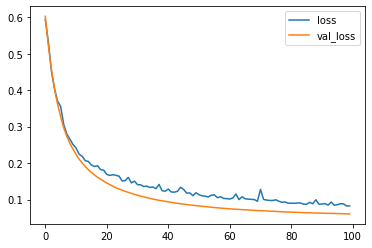

In [96]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

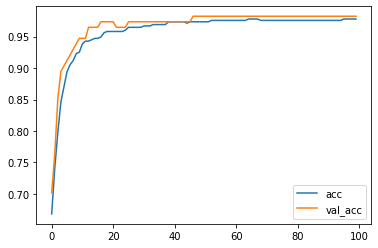

In [97]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()